In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pdb

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
data = np.load("spectral_function.npy")

In [19]:
# Axes
jet_F_angles = np.array([0, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
jet_F_temperature = np.array([1, 2, 2.5, 3, 3.5])
jet_F_velocity = np.array([-0.4, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.4])
jet_F_strouhal = np.array([-2, -1.6, -1.3, -1.15, -1, -0.824, -0.699, -0.602, -0.5, -0.398, -0.301, -0.222, 0, 0.477, 1, 1.6, 1.7, 2.5])

In [20]:
f_log10F = RegularGridInterpolator((jet_F_angles, jet_F_temperature, jet_F_velocity, jet_F_strouhal), data)

In [21]:
data.shape

(11, 5, 8, 18)

In [22]:
data_new = np.zeros((data.shape[0], data.shape[1]+5, data.shape[2], data.shape[3]))

In [32]:
jet_F_temp_new = np.array([0, 1, 2, 2.5, 3, 3.5, 4, 5, 6, 7])

In [46]:
for i in np.arange(np.size(jet_F_angles)):
    for j in np.arange(np.size(jet_F_temp_new)):
        for k in np.arange(np.size(jet_F_velocity)):
            for l in np.arange(np.size(jet_F_strouhal)):
                
                if jet_F_temp_new[j] in jet_F_temperature:
                    idx = np.where(jet_F_temperature == jet_F_temp_new[j])[0][0]
                    
                    data_new[i,j,k,l] = data[i,idx,k,l]
                else:
                    
                    theta = jet_F_angles[i]
                    Tt_j_star = jet_F_temp_new[j]
                    log10Vja0 = jet_F_velocity[k]
                    log10St = jet_F_strouhal[l]
                    
#                     pdb.set_trace()
                    
                    if Tt_j_star > 3.5:
                        mlog10F_a_lg = f_log10F((theta, 3.5, log10Vja0, log10St))
                        mlog10F_b_lg = f_log10F((theta, 3.4, log10Vja0, log10St))

                        data_new[i,j,k,l] = (mlog10F_a_lg - mlog10F_b_lg) / (0.1) * (Tt_j_star - 3.5) + mlog10F_a_lg

                    elif Tt_j_star < 1:
                        mlog10F_a_sm = f_log10F((theta, 1.1, log10Vja0, log10St))
                        mlog10F_b_sm = f_log10F((theta, 1.0, log10Vja0, log10St))

                        data_new[i,j,k,l] = (mlog10F_a_sm - mlog10F_b_sm) / (0.1) * (Tt_j_star - 1.0) + mlog10F_b_sm
                

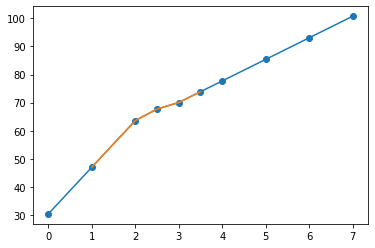

In [53]:
i = 9
k = 1
l = 16

plt.plot(jet_F_temp_new, data_new[i, :, k, l], 'o-')
plt.plot(jet_F_temperature, data[i, :, k, l])